In [9]:
import requests
from io import StringIO

In [10]:
import pandas as pd

In [11]:
# Show all columns when printing a DataFrame
pd.set_option("display.max_columns", None)

In [12]:
# Show wider text so columns don't wrap
pd.set_option("display.width", None)

In [13]:
url_2022 = "https://ffiec.cfpb.gov/v2/data-browser-api/view/nationwide/csv?years=2022&loan_purpose=1"
url_2023 = "https://ffiec.cfpb.gov/v2/data-browser-api/view/nationwide/csv?years=2023&loan_purpose=1"
url_2024 = "https://ffiec.cfpb.gov/v2/data-browser-api/view/nationwide/csv?years=2024&loan_purpose=1"

In [14]:
headers = {
    "User-Agent": "Mozilla/5.0"
}

In [15]:
response_2022 = requests.get(url_2022, headers=headers)
data_2022 = pd.read_csv(StringIO(response_2022.text))

/var/folders/v5/853tm03d4ds4l0z_4qjrndh40000gn/T/ipykernel_52401/1305237543.py:2: DtypeWarning: Columns (3,22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2022 = pd.read_csv(StringIO(response_2022.text))


In [16]:
response_2023 = requests.get(url_2023, headers=headers)
data_2023 = pd.read_csv(StringIO(response_2023.text))

/var/folders/v5/853tm03d4ds4l0z_4qjrndh40000gn/T/ipykernel_52401/2608906927.py:2: DtypeWarning: Columns (5,22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2023 = pd.read_csv(StringIO(response_2023.text))


In [17]:
response_2024 = requests.get(url_2024, headers=headers)
data_2024 = pd.read_csv(StringIO(response_2024.text))

/var/folders/v5/853tm03d4ds4l0z_4qjrndh40000gn/T/ipykernel_52401/1557109215.py:2: DtypeWarning: Columns (5,22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2024 = pd.read_csv(StringIO(response_2024.text))


In [18]:
print(data_2022.shape)
print(data_2023.shape)
print(data_2024.shape)

(16099307, 99)
(11564178, 99)
(12229298, 99)


In [19]:
if data_2022.columns.equals(data_2023.columns) and data_2022.columns.equals(data_2024.columns):
    print("Columns match across all years.")
else:
    print("Column mismatch detected!")

Columns match across all years.


In [20]:
data = pd.concat([data_2022, data_2023, data_2024], ignore_index=True)

In [21]:
data.shape

(39892783, 99)

In [22]:
data["loan_purpose"].value_counts()

loan_purpose
1     21033865
32     6526426
31     4228661
4      4014477
2      3941155
5       148199
Name: count, dtype: int64

In [23]:
data = data[data["loan_purpose"] == 1]

In [24]:
data.shape

(21033865, 99)

In [25]:
data["action_taken"].value_counts()

action_taken
1    11345121
6     3218611
4     2734561
3     1976161
5      599054
2      520559
8      457899
7      181899
Name: count, dtype: int64

**Values:**
- 1: Loan originated
- 2: Application approved but not accepted
- 3: Application denied
- 4: Application withdrawn by applicant
- 5: File closed for incompleteness
- 6: Purchased loan
- 7: Preapproval request denied
- 8: Preapproval request approved but not accepted

**Values will be grouped as:**
- 1,2,8: Approved
- 3,7: Denied

**Values to be removed:**
- 4, 5, 6

<Axes: xlabel='action_taken'>

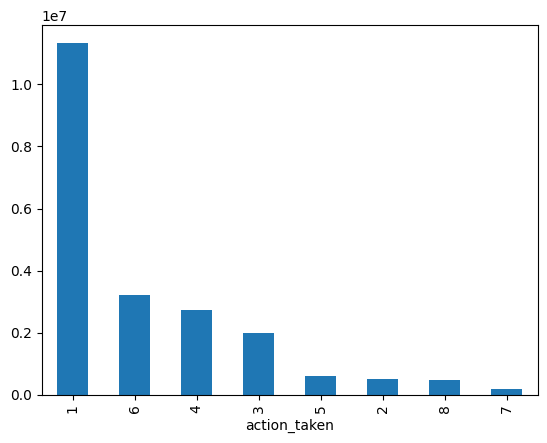

In [26]:
data['action_taken'].value_counts().plot(kind='bar')

In [28]:
approved_data = data[(data['action_taken'] == 1) | (data['action_taken'] == 2) | (data['action_taken'] == 8)]
denied_data = data[(data['action_taken'] == 3) | (data['action_taken'] == 7)]

In [29]:
print(approved_data.shape)
print(denied_data.shape)

(12323579, 99)
(2158060, 99)


In [30]:
#verify row count
print(data[data['action_taken'] == 1].shape[0] + data[data['action_taken'] == 2].shape[0] + data[data['action_taken'] == 8].shape[0])
print(data[data['action_taken'] == 3].shape[0] + data[data['action_taken'] == 7].shape[0])

12323579
2158060


In [31]:
df = pd.concat([approved_data, denied_data], ignore_index=True)

In [32]:
df.shape

(14481639, 99)

In [33]:
# verify
print(approved_data.shape[0] + denied_data.shape[0])

14481639


In [35]:
# Amout of rows removed because of application incompleteness, withdrawal, or other reasons
row_removed = data.shape[0] - df.shape[0]
print(f"Rows removed: {row_removed:,}")

Rows removed: 6,552,226


In [37]:
df.head(2)

,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co-applicant_credit_score_type,applicant_ethnicity-1,applicant_ethnicity-2,applicant_ethnicity-3,applicant_ethnicity-4,applicant_ethnicity-5,co-applicant_ethnicity-1,co-applicant_ethnicity-2,co-applicant_ethnicity-3,co-applicant_ethnicity-4,co-applicant_ethnicity-5,applicant_ethnicity_observed,co-applicant_ethnicity_observed,applicant_race-1,applicant_race-2,applicant_race-3,applicant_race-4,applicant_race-5,co-applicant_race-1,co-applicant_race-2,co-applicant_race-3,co-applicant_race-4,co-applicant_race-5,applicant_race_observed,co-applicant_race_observed,applicant_sex,co-applicant_sex,applicant_sex_observed,co-applicant_sex_observed,applicant_age,co-applicant_age,applicant_age_above_62,co-applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus-1,aus-2,aus-3,aus-4,aus-5,denial_reason-1,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,254900ACUWEGW702BR80,35614,NY,36061.0,36061016002.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,6,2,1,1,1,2,2,2,415000.0,69.5,5.375,0.407,2,9962.19,NaN,7745.0,6255.0,NaN,360.0,NaN,NaN,2,2,2,2,605000.0,1,1,3,5,1,NaN,118.0,NaN,2,9,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2,2,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,2,2,1,2,2,65-74,65-74,Yes,Yes,1,1,2,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3607,36.57,99000,152.12,440,55,0
1,2022,254900ACUWEGW702BR80,35614,NY,36081.0,36081071100.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,0,2,1,1,1,2,2,2,655000.0,76.471,5.0,0.152,2,8966.72,NaN,4740.0,3250.0,NaN,360.0,NaN,84.0,2,2,2,2,865000.0,1,1,3,5,1,NaN,228.0,30%-<36%,2,9,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,2,5,2,4,25-34,9999,No,NaN,1,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,5687,55.57,99000,132.73,1769,597,65


In [52]:
columns_to_keep = [
    'state_code', 'county_code', 'derived_loan_product_type', 'derived_dwelling_category', 'derived_ethnicity', 'derived_race', 'derived_sex', 'action_taken', 'purchaser_type', 
    'loan_type', 'loan_amount', 'interest_rate', 'total_loan_costs', 'loan_term', 'property_value', 'construction_method', 'occupancy_type', 
    'manufactured_home_secured_property_type', 'manufactured_home_land_property_interest', 'total_units', 'income', 'debt_to_income_ratio', 
    'applicant_credit_score_type', 'applicant_race-1', 'applicant_sex', 'applicant_age', 'applicant_age_above_62', 'denial_reason-1'
]

In [53]:
df = df[columns_to_keep]

In [54]:
df.shape

(14481639, 28)

In [64]:
# 1 = approved, 0 = denied
df.loc[(df['action_taken']==2) | (df['action_taken']==8), 'action_taken'] = 1
df.loc[(df['action_taken']==3) | (df['action_taken']==7), 'action_taken'] = 0

In [65]:
df['action_taken'].value_counts()

action_taken
1    12323579
0     2158060
Name: count, dtype: int64

In [66]:
df.to_csv('../Step 2/df_trimmed.csv', index=False)

In [67]:
df.head()

,state_code,county_code,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,loan_type,loan_amount,interest_rate,total_loan_costs,loan_term,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,income,debt_to_income_ratio,applicant_credit_score_type,applicant_race-1,applicant_sex,applicant_age,applicant_age_above_62,denial_reason-1
0,NY,36061.0,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,6,1,415000.0,5.375,9962.19,360.0,605000.0,1,1,3,5,1,118.0,NaN,2,5.0,2,65-74,Yes,10
1,NY,36081.0,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,0,1,655000.0,5.0,8966.72,360.0,865000.0,1,1,3,5,1,228.0,30%-<36%,2,5.0,2,25-34,No,10
2,NJ,34025.0,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,0,1,455000.0,5.875,NaN,360.0,805000.0,1,3,3,5,1,169.0,20%-<30%,1,5.0,1,35-44,No,10
3,NJ,34029.0,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,6,1,365000.0,4.125,NaN,360.0,575000.0,1,3,3,5,1,238.0,46,1,5.0,1,35-44,No,10
4,NY,36059.0,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,0,1,785000.0,5.375,9895.94,360.0,875000.0,1,1,3,5,1,158.0,42,3,5.0,1,35-44,No,10


In [69]:
df.shape

(14481639, 28)